In [31]:
import os
import pandas as pd
import requests
import matplotlib as plt
import seaborn as sns
from urllib.parse import quote

In [36]:
data = pd.read_csv("./data/fake_or_real_news.csv", index_col=0)

before data processing: (6335, 3)
after data processing: (6274, 6)


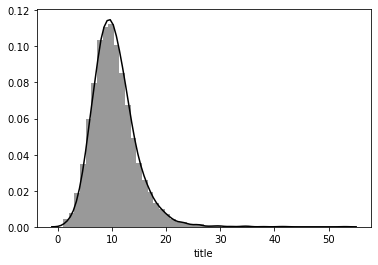

In [37]:
print("before data processing: " + str(data.shape))
sns.distplot(data.title.apply(lambda x: len(x.split())), color="black")
data["title_split"] = data.title.apply(lambda x: x.split())
data["title_len"] = data.title.apply(lambda x: len(x.split()))
data["title_url"] = data.title.apply(lambda x: quote(x, safe=""))
data = data[(data.title_len >= 3) & (data.title_len <= 25)]
print("after data processing: " + str(data.shape))
data.reset_index(drop=True,inplace=True)

In [38]:
data

,title,text,label,title_split,title_len,title_url
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[You, Can, Smell, Hillary’s, Fear]",5,You%20Can%20Smell%20Hillary%E2%80%99s%20Fear
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...",14,Watch%20The%20Exact%20Moment%20Paul%20Ryan%20C...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[Kerry, to, go, to, Paris, in, gesture, of, sy...",9,Kerry%20to%20go%20to%20Paris%20in%20gesture%20...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[Bernie, supporters, on, Twitter, erupt, in, a...",15,Bernie%20supporters%20on%20Twitter%20erupt%20i...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[The, Battle, of, New, York:, Why, This, Prima...",9,The%20Battle%20of%20New%20York%3A%20Why%20This...
...,...,...,...,...,...,...
6269,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,"[State, Department, says, it, can't, find, ema...",11,State%20Department%20says%20it%20can%27t%20fin...
6270,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,"[The, ‘P’, in, PBS, Should, Stand, for, ‘Pluto...",10,The%20%E2%80%98P%E2%80%99%20in%20PBS%20Should%...
6271,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,"[Anti-Trump, Protesters, Are, Tools, of, the, ...",9,Anti-Trump%20Protesters%20Are%20Tools%20of%20t...
6272,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"[In, Ethiopia,, Obama, seeks, progress, on, pe...",11,In%20Ethiopia%2C%20Obama%20seeks%20progress%20...


In [56]:
listquery = data.title.tolist()

In [57]:
URL = "https://www.googleapis.com/customsearch/v1"
query = listquery[0]
PARAMS = {'key':, 'cx':, 'q':query}
r = requests.get(url = URL, params = PARAMS) 
res = r.json()
#URL = "https://duckduckgo.com/html/?q=x"

In [69]:
print(res["items"][4]["snippet"])


Dec 23, 2009 ... “The smell of fear” turns out to have a foundation in science. All sweat smells—
and some sweat screams anxiety to the world, according to a ...
